In [1]:
import numpy as np
import pandas as pd
import scipy.optimize
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("Data\RE__Data_for_Degradation\Degradation_45DegC_1C_resistance.csv",sep = ",")
dff = pd.read_csv("Data\RE__Data_for_Degradation\Degradation_45DegC_1C.CSV",sep = ",")
print(df)

        Cycle  Resistance %
0    3.328864      0.688996
1  202.243230      0.734724
2  393.891630      3.077659
3  596.370300      6.802410
4  798.875100      8.688065


In [15]:
S = dff['Capacity %']
Cycle = dff['Cycle']

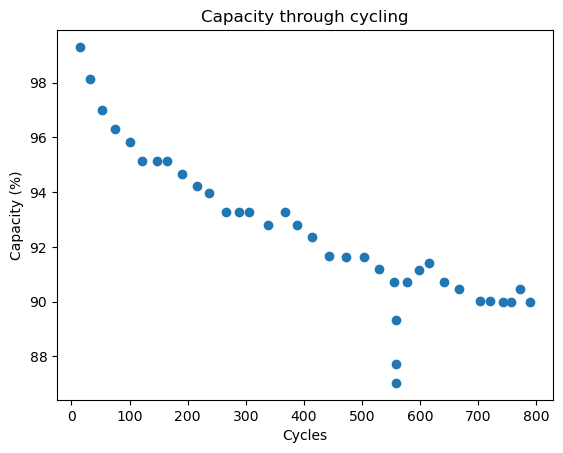

In [16]:
plt.figure()
plt.scatter(Cycle,S)
plt.xlabel("Cycles")
plt.ylabel("Capacity (%)")
plt.title("Capacity through cycling")
plt.show()

1. Comment on the suitability of the data for this purpose : 

The overall shape of the data seems quite suitable to be used for the fitting excepted an issue around 550 cycles. 
This point should be removed in order not to pollute too muche the fit. 
Moreover, it is not perfectly monotone, so preprocessing the data is necessary to do a fitting. 


In [17]:
Sc = []
Cyclec = []
for k in range (len(S)) :
    if not(k == 25 or k == 26 or k == 24) :
        Sc.append(S[k])
        Cyclec.append(Cycle[k])


Corrected graph

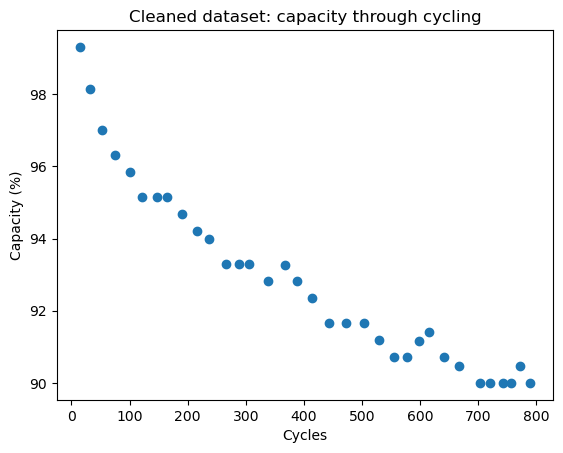

In [18]:
plt.figure()
plt.scatter(Cyclec,Sc)
plt.xlabel("Cycles")
plt.ylabel("Capacity (%)")
plt.title("Cleaned dataset: capacity through cycling")
plt.show()

R² = 0.9816474210060526
Y = 1156.1403265331987 * e^(0.45249286385304327 * ln(x))*e^(-22406/RT)
Tau = 110.4989801921795 µs


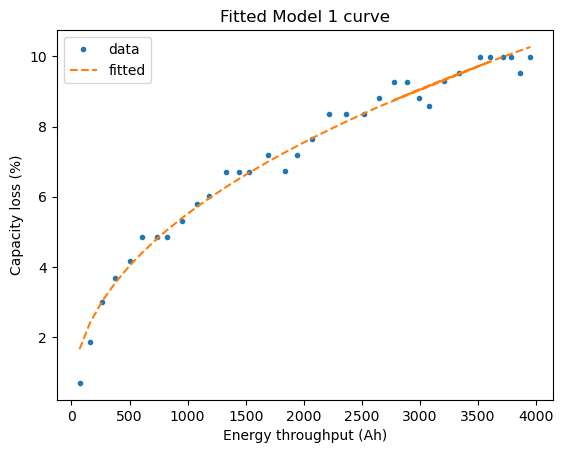

In [19]:
Cyclec = np.array(Cyclec)
Sc = np.array(Sc)
So = 100-Sc
Cycleco = Cyclec*2.5*2
Rcg = 8.314
T = 45+273.15
Ec = 22406
def monoExp(x, m, t):
    return m * np.exp(t*np.log(x))*np.exp(-Ec/(Rcg*T))


# perform the fit
p0 = (100, .01) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp,Cycleco,So, p0)
m, t= params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(So - monoExp(Cycleco, m, t))
squaredDiffsFromMean = np.square(So - np.mean(So))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(Cycleco, So, '.', label="data")
plt.plot(Cycleco, monoExp(Cycleco, m, t), '--', label="fitted")
plt.title("Fitted Model 1 curve")
plt.xlabel("Energy throughput (Ah)")
plt.ylabel("Capacity loss (%)")
plt.legend()
# inspect the parameters
print(f"Y = {m} * e^({t} * ln(x))*e^(-{Ec}/RT)")
print(f"Tau = {tauSec * 1e6} µs")
ac = m
z = t

R² = 0.9816474210060591
Y = 1798.2399214801071 * e^(0.31152851006264975 * ln(x))*e^(-22406/RT)
Tau = 160.49895397998978 µs


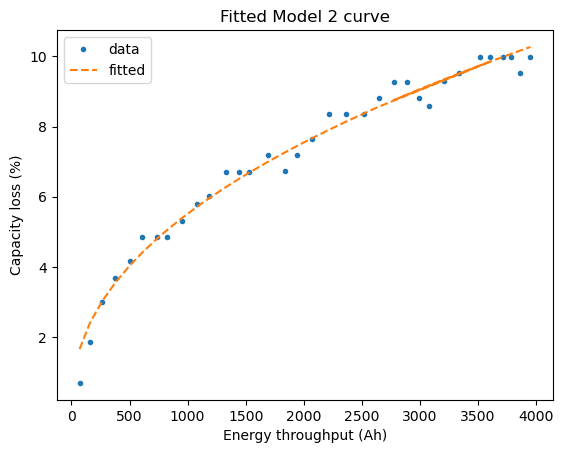

In [20]:

def monoExp2(x, m, t):
    return (m * np.exp(t*np.log(x))*np.exp(-Ec/(Rcg*T)))**(1/(1-t))


# perform the fit
p0 = (100, .01) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp2,Cycleco,So, p0)
m, t= params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(So - monoExp2(Cycleco, m, t))
squaredDiffsFromMean = np.square(So - np.mean(So))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(Cycleco, So, '.', label="data")
plt.plot(Cycleco, monoExp2(Cycleco, m, t), '--', label="fitted")
plt.title("Fitted Model 2 curve")
plt.xlabel("Energy throughput (Ah)")
plt.ylabel("Capacity loss (%)")
plt.legend()
# inspect the parameters
print(f"Y = {m} * e^({t} * ln(x))*e^(-{Ec}/RT)")
print(f"Tau = {tauSec * 1e6} µs")
ac2 = m
z2 = t

1341 = ac

0.508 = z

In [21]:
R = df['Resistance %']
Cycle1 = df['Cycle']

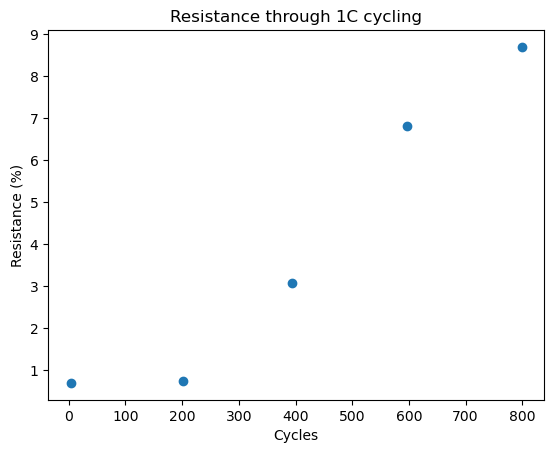

R² = 0.926520192150382
Y = [664518.63830414] *x*np.exp(-Ec/(R*T))
Tau = 160.49895397998978 µs
[664518.63830414]


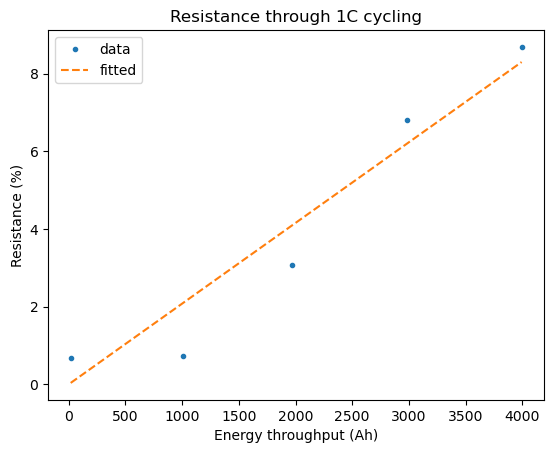

In [22]:
plt.figure()
plt.scatter(Cycle1,R)
plt.xlabel("Cycles")
plt.ylabel("Resistance (%)")
plt.title("Resistance through 1C cycling")
plt.show()
Cycle1 = np.array(Cycle1)*2.5*2
R = np.array(R)
R0 = 0.02 #trouver R0 comme une fonction de la temperature et l'evaluer tout le temps
Ec2 = 51800

def monoExp(x, m):
    return m *x*np.exp(-Ec2/(Rcg*T))


# perform the fit
p0 = (100) # start with values near those we expect
params, cv = scipy.optimize.curve_fit(monoExp,Cycle1,R, p0)
m = params
sampleRate = 20_000 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(R - monoExp(Cycle1, m))
squaredDiffsFromMean = np.square(R - np.mean(R))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(Cycle1, R, '.', label="data")
plt.plot(Cycle1, monoExp(Cycle1, m), '--', label="fitted")
plt.xlabel("Energy throughput (Ah)")
plt.ylabel("Resistance (%)")
plt.legend()
plt.title("Resistance through 1C cycling")

# inspect the parameters
print(f"Y = {m} *x*np.exp(-Ec/(R*T))")
print(f"Tau = {tauSec * 1e6} µs")
bc = m 
print(bc)

[283.15 293.15 303.15 313.15 323.15 333.15]


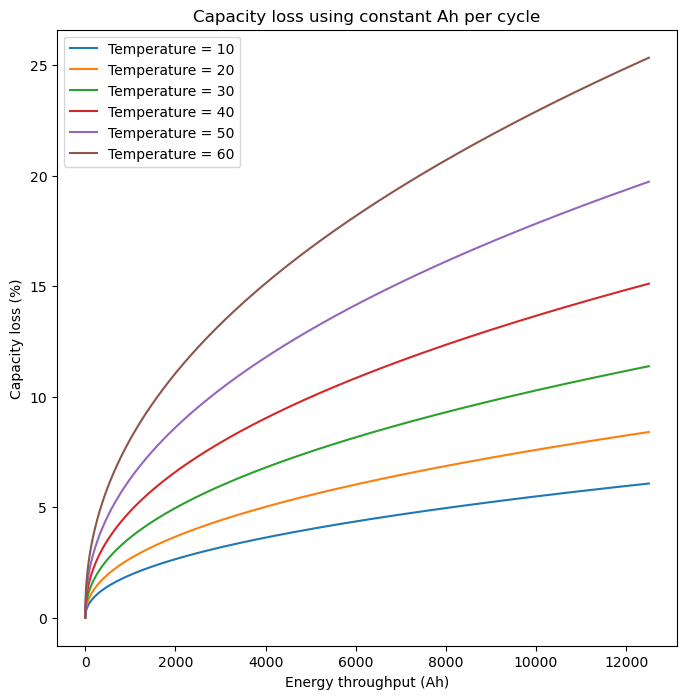

In [23]:
Temp = [10,20,30,40,50,60]
T0 = Temp
Temp = np.array(Temp)
Temp = Temp + 273.15
print(Temp)
Ah = np.linspace(0,5000,1000)*2.5 #car 15Ah pour 1C
Sloss = []
plt.figure(figsize = (8,8))

for k in range(6) :
    
    Sloss.append((ac *Ah**z )*np.exp(-Ec/(8.314*Temp[k])))
    plt.plot(Ah, Sloss[k],label = "Temperature = "+str(T0[k]))
plt.xlabel("Energy throughput (Ah)")
plt.ylabel("Capacity loss (%)")
plt.title("Capacity loss using constant Ah per cycle")
plt.legend()
plt.show() 


[283.15 293.15 303.15 313.15 323.15 333.15]


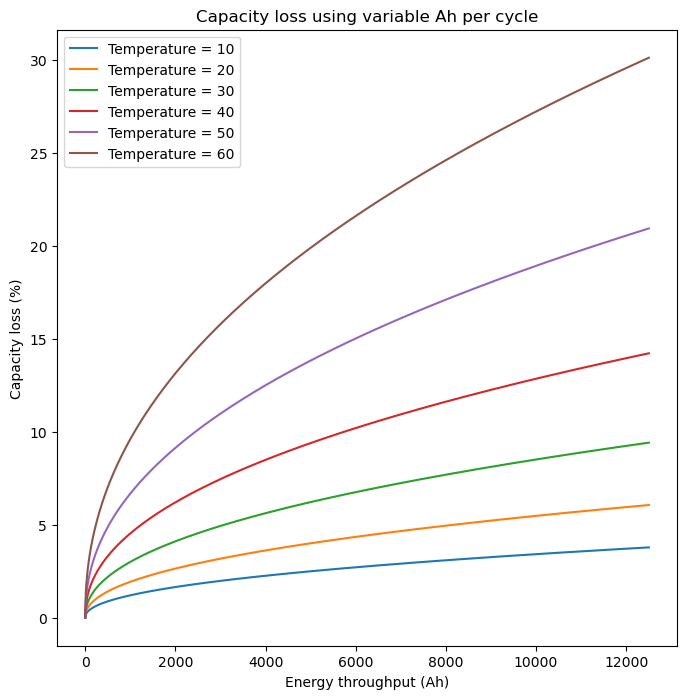

In [24]:

print(Temp)
Ah = np.linspace(0,5000,1000)*2.5 #car 15Ah pour 1C
Sloss = []
plt.figure(figsize = (8,8))

for k in range(6) :
    
    Sloss.append(((ac2 *Ah**z2 )*np.exp(-Ec/(8.314*Temp[k])))**(1/(1-z2)))
    plt.plot(Ah, Sloss[k],label = "Temperature = "+str(T0[k]))

plt.xlabel("Energy throughput (Ah)")
plt.title("Capacity loss using variable Ah per cycle")
plt.ylabel("Capacity loss (%)")
plt.legend()
plt.show() 

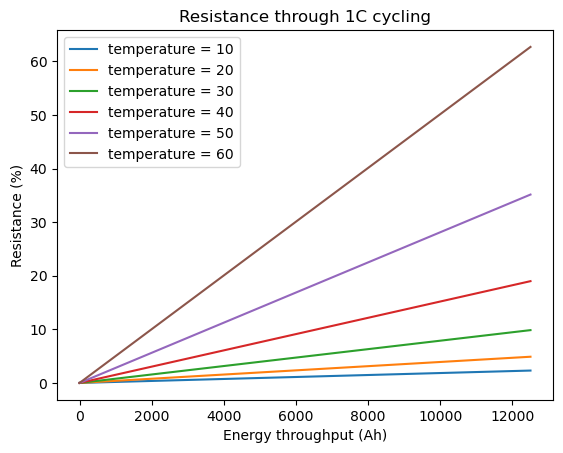

In [25]:
Rinc = []
plt.figure()

for k in range(6) :
    
    Rinc.append((bc *Ah )*np.exp(-Ec2/(8.314*Temp[k])))
    plt.plot(Ah, Rinc[k],label = "temperature = "+str(T0[k]))

plt.xlabel("Energy throughput (Ah)")
plt.ylabel("Resistance (%)")
plt.legend()
plt.title("Resistance through 1C cycling")
plt.show() 